In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [4]:
df.tail(3)

,Gender,Height,Weight
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
df.shape

(10000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
df.isna().any()

Gender    False
Height    False
Weight    False
dtype: bool

In [8]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

## Data Visualization

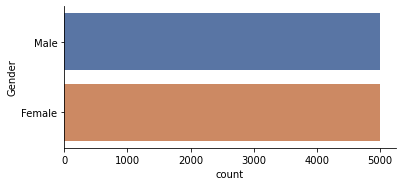

In [11]:
sns.catplot(y='Gender', kind='count', data=df, height=2.5, aspect=2.2, palette = 'deep')

<AxesSubplot:xlabel='Height', ylabel='Density'>

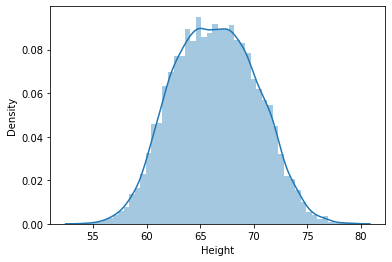

In [12]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

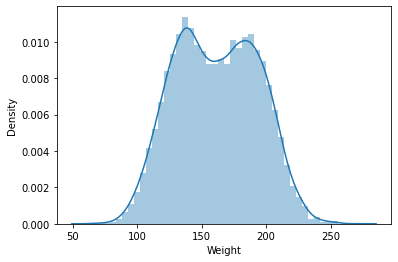

In [13]:
sns.distplot(df['Weight'])

- Replace Male = 0 
- Replace Female = 1
- The Label is Gender

In [14]:
df['Gender'] = df['Gender'].replace('Male', 0)
df['Gender'] = df['Gender'].replace('Female', 1)

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Height,Weight
Gender,1.000000,-0.691072,-0.796723
Height,-0.691072,1.000000,0.924756
Weight,-0.796723,0.924756,1.000000


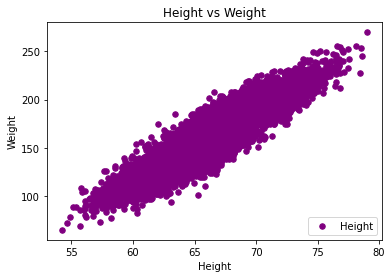

In [16]:
#Plot Height vs Weight
height = df.iloc[:, 1].values
weight = df.iloc[:, 2].values
plt.scatter(height,weight,label='Height',color='Purple',s=30)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()

because it's all is numeric we can direct to split train test dataset

## Train Test Dataset

In [17]:
X = df.drop(['Gender'],axis=1)
y = df['Gender']

In [18]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 142)

In [19]:
X_train.shape

(7000, 2)

In [20]:
y_train.shape

(7000,)

## Modelling Time

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#predicting
y_pred = lr.predict(X_test)
print(y_pred)

[0.09483136 0.78996352 1.0034719  ... 0.1106678  0.77212086 0.42999506]


In [22]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
print('Coefficients: ', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))

Coefficients:  [ 0.04163266 -0.01701346]
Mean squared error: 0.09
Variance score: 0.65


### decision tree 

In [23]:
#decision tree 
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#predicting
y_pred1 = dt.predict(X_test)
print(y_pred1)

[0. 1. 1. ... 0. 1. 0.]


In [24]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((dt.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % dt.score(X_test, y_test))

Mean squared error: 0.12
Variance score: 0.50


### XGBRegressor

In [25]:
xgb = XGBRegressor()
xgb.fit(X_test,y_test)

predict2 = xgb.predict(X_test)
print(predict2)

[-3.2168031e-03  3.8459706e-01  1.0034124e+00 ...  8.6650252e-04
  9.9112546e-01  9.0421557e-02]


In [26]:
# Predicting the Test set results
y_pred2 = xgb.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((xgb.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % xgb.score(X_test, y_test))

Mean squared error: 0.01
Variance score: 0.97


### Catboost Regressor

In [27]:
cb = CatBoostRegressor()
cb.fit(X_test,y_test)

predict3 = cb.predict(X_test)
print(predict3)

Learning rate set to 0.04746
0:	learn: 0.4829428	total: 302ms	remaining: 5m 1s
1:	learn: 0.4668663	total: 310ms	remaining: 2m 34s
2:	learn: 0.4525265	total: 321ms	remaining: 1m 46s
3:	learn: 0.4382745	total: 327ms	remaining: 1m 21s
4:	learn: 0.4248918	total: 330ms	remaining: 1m 5s
5:	learn: 0.4125177	total: 338ms	remaining: 55.9s
6:	learn: 0.4005184	total: 349ms	remaining: 49.5s
7:	learn: 0.3895608	total: 353ms	remaining: 43.7s
8:	learn: 0.3793716	total: 356ms	remaining: 39.3s
9:	learn: 0.3697068	total: 362ms	remaining: 35.9s
10:	learn: 0.3608328	total: 367ms	remaining: 33s
11:	learn: 0.3522808	total: 370ms	remaining: 30.5s
12:	learn: 0.3445005	total: 373ms	remaining: 28.3s
13:	learn: 0.3373496	total: 376ms	remaining: 26.5s
14:	learn: 0.3302424	total: 391ms	remaining: 25.7s
15:	learn: 0.3238105	total: 394ms	remaining: 24.2s
16:	learn: 0.3179751	total: 398ms	remaining: 23s
17:	learn: 0.3123594	total: 400ms	remaining: 21.8s
18:	learn: 0.3072973	total: 404ms	remaining: 20.9s
19:	learn: 0.

In [28]:
# Predicting the Test set results
y_pred3 = cb.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((cb.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % cb.score(X_test, y_test))

Mean squared error: 0.04
Variance score: 0.85


### LGBMRegressor

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
lgb = LGBMRegressor()
lgb.fit(X_test,y_test)

predict4 = lgb.predict(X_test)
print(predict4)

[-0.00150921  0.77461113  1.00318201 ...  0.02481482  1.02289986
  0.16415303]


In [31]:
# Predicting the Test set results
y_pred4 = lgb.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lgb.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lgb.score(X_test, y_test))

Mean squared error: 0.04
Variance score: 0.83


#### Accuracy comparision for various models.

In [32]:
models = [lr, dt, xgb, cb, lgb]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    r2 = np.mean((model.predict(X_test) - y_test) ** 2)
    accuracy_scores.append(r2)
    
print(accuracy_scores)

[0.08673607323061573, 0.125, 0.008047844940017097, 0.03626058692597433, 0.04136709890627473]


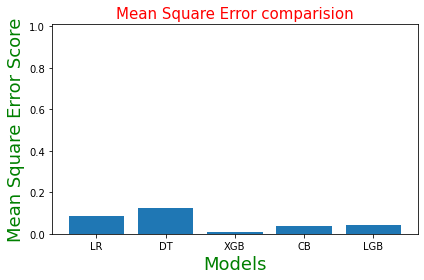

In [33]:
plt.bar(['LR', 'DT', 'XGB', 'CB', 'LGB'],accuracy_scores)
plt.ylim(0.00,1.01)
plt.title('Mean Square Error comparision', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Mean Square Error Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()

In [34]:
models = [lr, dt, xgb, cb, lgb]
variance_score = []
for model in models:
    y_pred = model.predict(X_test)
    skor = model.score(X_test, y_test)
    variance_score.append(skor)
    
print(variance_score)

[0.6530370481810173, 0.49997310966500863, 0.96780688896596, 0.8549498518214673, 0.8345227053737243]


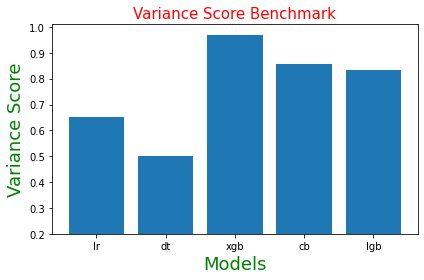

In [35]:
plt.bar(['lr', 'dt', 'xgb', 'cb', 'lgb'],variance_score)
plt.ylim(0.20,1.01)
plt.title('Variance Score Benchmark', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Variance Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()